# Versión en Python

In [1]:
import pandas as pd
import arcovid19 as ac
import numpy as np

In [2]:
#el problema es que no es un CSV de texto plano, sino un archivo de datos sin formato.
#Lo podes verificar con:
#!file Covid19Determinaciones.csv

# para pasarlo a texto plano (ascii) podes hacer esto:

#!iconv -f utf-16 -t utf-8 Covid19Determinaciones.csv > Covid19Determinaciones_ascii.csv

Covid19Determinaciones.csv: Little-endian UTF-16 Unicode text, with CRLF line terminators


In [3]:
#Curación
df = pd.read_csv('Covid19Determinaciones_ascii.csv')
df = df.fillna(0)
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df['ultima_actualizacion'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df = df[['fecha', 'provincia', 'total', 'positivos']]


'''sub_DataFrame'''
df = df.set_index(['fecha', 'provincia'])
df_fechas_provincia = df.groupby(['fecha','provincia'], as_index = True).sum()
df_fechas_provincia.head(6)


total  positivos
fecha      provincia                     
2020-02-11 CABA              2        0.0
2020-02-20 Buenos Aires      1        0.0
           CABA              1        0.0
2020-02-27 CABA              4        0.0
2020-02-28 CABA             10        0.0
2020-03-02 CABA              5        0.0

In [4]:
'''Distribuciones Acumuladas por fecha y provincia para CABA'''

df_provincia_CABA = df_fechas_provincia.loc[(slice(None), 'CABA'), :]

dfa_total_fecha_CABA = df_provincia_CABA.total.cumsum().values
dfa_positivos_fecha_CABA = df_provincia_CABA.positivos.cumsum().values

dfa_CABA = df_provincia_CABA.reset_index(['fecha', 'provincia'])
dfa_CABA['dfa_total'] = dfa_total_fecha_CABA
dfa_CABA['dfa_positivos'] = dfa_positivos_fecha_CABA


'''Lista de fechas'''

df_fecha = df_provincia_CABA.groupby('fecha', as_index = True).sum()
fechas = df_fecha.index.unique()
dias = [0]
for d in range(1, len(fechas)):
    Delta_t = (fechas[d]-fechas.min()).days
    dias.append(Delta_t)

dfa_CABA['dias'] = dias


'''save DataFrame'''

dfa_CABA.drop(['total', 'positivos', 'provincia'],
              axis =1).to_csv('dfa_fecha_CABA.csv', index=False, encoding='utf-8')


In [5]:
'''Distribuciones Acumuladas por fecha y provincia para CBA'''

df_provincia_CBA = df_fechas_provincia.loc[(slice(None), 'Córdoba'), :]

dfa_total_fecha_CBA = df_provincia_CBA.total.cumsum().values
dfa_positivos_fecha_CBA = df_provincia_CBA.positivos.cumsum().values

dfa_CBA = df_provincia_CBA.reset_index(['fecha', 'provincia'])
dfa_CBA['dfa_total'] = dfa_total_fecha_CBA
dfa_CBA['dfa_positivos'] = dfa_positivos_fecha_CBA


'''Lista de fechas'''

df_fecha = df_provincia_CBA.groupby('fecha', as_index = True).sum()
fechas = df_fecha.index.unique()
dias = [0]
for d in range(1, len(fechas)):
    Delta_t = (fechas[d]-fechas.min()).days
    dias.append(Delta_t)

dfa_CBA['dias'] = dias


'''save DataFrame'''

dfa_CBA.drop(['total', 'positivos', 'provincia'],
              axis =1).to_csv('dfa_fecha_CBA.csv', index=False, encoding='utf-8')

In [9]:
'''Distribuciones Acumuladas por fecha para toda la nación'''

df_fecha = df_fechas_provincia.groupby('fecha', as_index = True).sum()

dfa_total_fecha = df_fecha.total.cumsum().values
dfa_positivos_fecha = df_fecha.positivos.cumsum().values


'''Lista de fechas'''

df_fecha = df_fechas_provincia.groupby('fecha', as_index = True).sum()
fechas = df_fecha.index.unique()
dias = [0]
for d in range(1, len(fechas)):
    Delta_t = (fechas[d]-fechas.min()).days
    dias.append(Delta_t)


df_fecha['dfa_total'] = dfa_total_fecha
df_fecha['dfa_positivos'] = dfa_positivos_fecha
df_fecha['dias'] = dias


'''save DataFrame'''

df_fecha.drop(['total','positivos'],
              axis =1).reset_index('fecha').to_csv('dfa_fecha_nac.csv', index=False,
                                     encoding='utf-8')

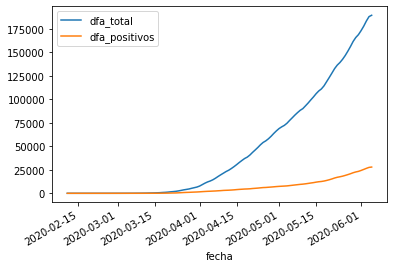

In [24]:
df_fecha.dfa_total.plot(legend=True)
df_fecha.dfa_positivos.plot(legend=True)